# Daymet

In [1]:
import matplotlib.pyplot as plt
import pydaymet as daymet
from pynhd import NLDI

The Daymet database provides climatology data at 1-km resolution. First, we use [PyNHD](https://github.com/cheginit/pynhd) to get the contributing watershed geometry of a NWIS station with the ID of `USGS-01031500`:

In [2]:
geometry = NLDI().get_basins("01031500").geometry[0]

[PyDaymet](https://github.com/cheginit/pynhd) allows us to get the data for a single pixel or for a region as gridded data. The function to get single pixel is called `pydaymet.get_bycoords` and for gridded data is called `pydaymet.get_bygeom`. The arguments of these functions are identical except the first argument where the latter
should be polygon and the former should be a coordinate (a tuple of length two as in `(x, y)`).

The input geometry or coordinate can be in any valid CRS (defaults to EPSG:4326). The `date`
argument can be either a tuple of length two like `(start_str, end_str)` or a list of years
like `[2000, 2005]`.

It is noted that both functions have a `pet` flag for computing PET.
Additionally, we can pass `time_scale` to get daily, monthly or annual summaries. This flag
by default is set to daily. We can pass `time_scale` as `daily`, `monthly`, or `annual`
to `get_bygeom` or `get_bycoords` functions to download the respective summaries.

In [3]:
var = ["prcp", "tmin"]
dates = ("2000-01-01", "2000-06-30")
daily = daymet.get_bygeom(geometry, dates, variables=var, pet=True)
monthly = daymet.get_bygeom(geometry, dates, variables=var, time_scale="monthly")

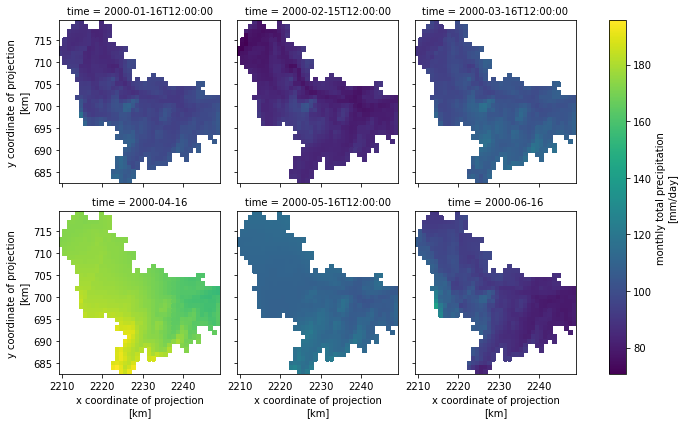

In [5]:
ax = monthly.prcp.plot(x="x", y="y", row="time", col_wrap=3)
ax.fig.savefig("daymet_grid.png", dpi=100, facecolor="w", bbox_inches="tight")

Note that the default CRS is EPSG:4326. If the input geometry (or coordinate) is in a different CRS we can pass it to the function. The gridded data are automatically masked to the input geometry. Now, Let's get the data for a coordinate in EPSG:3542 CRS.

In [5]:
coords = (-1431147.7928, 318483.4618)
crs = "epsg:3542"
dates = ("2000-01-01", "2006-12-31")
annual = daymet.get_bycoords(coords, dates, variables=var, loc_crs=crs, time_scale="annual")

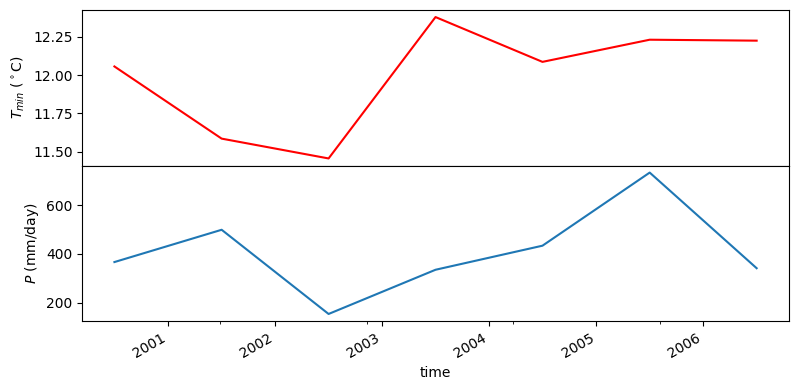

In [6]:
fig = plt.figure(figsize=(8, 4), dpi=100, facecolor="w")

gs = fig.add_gridspec(1, 2)
axes = gs[:].subgridspec(2, 1, hspace=0).subplots(sharex=True)
annual["tmin (degrees C)"].plot(ax=axes[0], color="r")
axes[0].set_ylabel(r"$T_{min}$ ($^\circ$C)")
axes[0].xaxis.set_ticks_position("none")
annual["prcp (mm/day)"].plot(ax=axes[1])
axes[1].set_ylabel("$P$ (mm/day)")

plt.tight_layout()
fig.savefig("_static/daymet_loc.png", dpi=100, facecolor="w", bbox_inches="tight")

Next, let's get annual total precipitation for Hawaii and Puerto Rico for 2010.

In [7]:
hi_ext = (-160.3055, 17.9539, -154.7715, 23.5186)
pr_ext = (-67.9927, 16.8443, -64.1195, 19.9381)
hi = daymet.get_bygeom(hi_ext, 2010, variables="prcp", region="hi", time_scale="annual")
pr = daymet.get_bygeom(pr_ext, 2010, variables="prcp", region="pr", time_scale="annual")

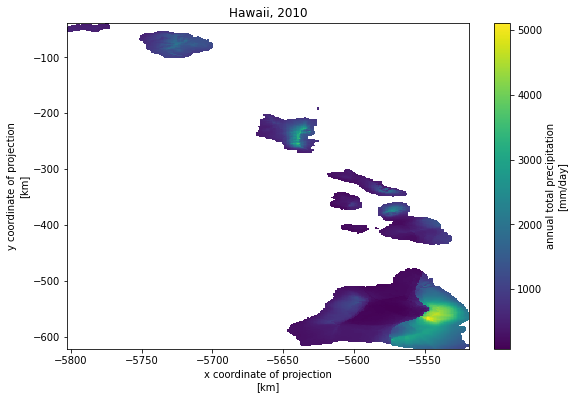

In [8]:
ax = hi.prcp.plot(size=6)
plt.title("Hawaii, 2010")
ax.figure.savefig("_static/hi.png", dpi=100, facecolor="w", bbox_inches="tight")

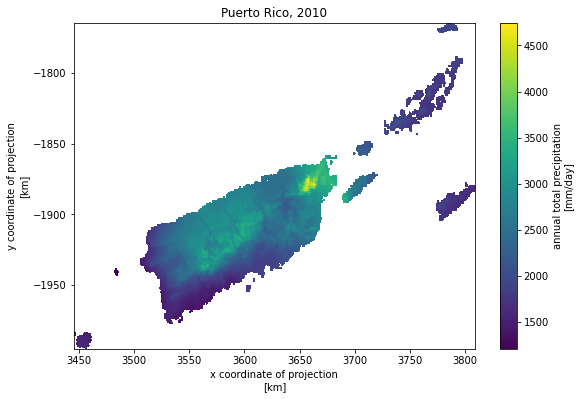

In [9]:
ax = pr.prcp.plot(size=6)
plt.title("Puerto Rico, 2010")
ax.figure.savefig("_static/pr.png", dpi=100, facecolor="w", bbox_inches="tight")